In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

FILE_NAME = "housing.data"

file_path = os.path.join(os.getcwd(), FILE_NAME)

housing = pd.read_csv(file_path, header=None, sep='\s+')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                        'RM', 'AGE', 'DIS', 'RAD',
                        'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
from sklearn.model_selection import train_test_split
X = housing.iloc[:,:-1].values
y = housing['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print("Genauigkeit auf den Trainingsdaten: {:.3f}".format(lr.score(X_train, y_train)))
print("Genauigkeit auf den Testdaten: {:.3f}".format(lr.score(X_test, y_test)))

Genauigkeit auf den Trainingsdaten: 0.765
Genauigkeit auf den Testdaten: 0.673


In [13]:
lr.predict([0.02729 ,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03])

/home/ml/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 30.47117826])

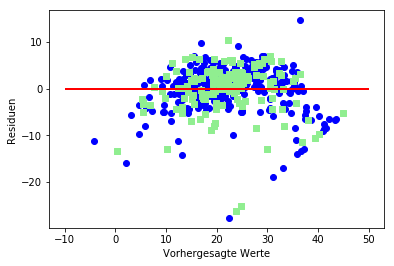

In [22]:
def plot_residuen(model):

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='Trainingsdaten')
    plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='Testdaten')
    plt.xlabel('Vorhergesagte Werte')
    plt.ylabel('Residuen')
    plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
    
    
plot_residuen(lr)

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE-Training: %.3f, Test: %.3f' %(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2-Training: %.3f, Test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE-Training: 1.409, Test: 14.354
R^2-Training: 0.983, Test: 0.828


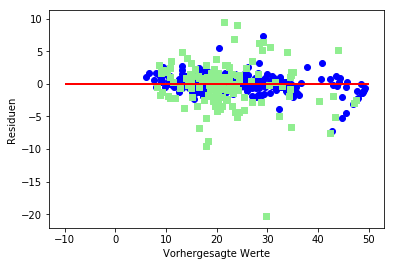

In [30]:
plot_residuen(forest)